In [ ]:
# Checking the directories
!ls /d/KWS

In [ ]:
!ls /d/KWS/data

In [ ]:
# Extracting the feaures in the feat_librosa folder
#!tar -xvf  '/d/KWS/data/feat_compressed.tar' -C '/d/KWS/data/'

In [ ]:
#!pip install matplotlib

In [1]:
# Importing the required Libraries
import torch
#import librosa
import os
import time
from tqdm import tqdm
import numpy as np
import pickle

C:\ProgramData\Anaconda3\envs\kws_project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\envs\kws_project\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\kws_project\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


##### Creating Train and Test Data 

In [2]:
# Creating Training and Testing data
feat_shape = 512
root = 'D:/KWS/data/'
feat_folder = os.path.join(root, 'feat')

lst = sorted(os.listdir(feat_folder))

labels = [d for d in lst if os.path.isdir(os.path.join(feat_folder, d))
          and d[0].isalpha()]

train_samples = [0 for label in labels]
test_samples = [0 for label in labels]

#count train-test first
for i, label in enumerate(labels):
    record_list = sorted(os.listdir(os.path.join(feat_folder, label)))
    for r, record_name in enumerate(record_list):
        if hash(record_name) % 10 < 9:
            train_samples[i] += 1
        else:
            test_samples[i] += 1

for i, label in tqdm(enumerate(labels)):    
    record_list = sorted(os.listdir(os.path.join(feat_folder, label)))
    time_s = time.time()
    train_count = 0
    test_count = 0
    train_data_class = np.full((train_samples[i], 1), i, dtype=np.uint8)
    train_data_in = np.empty((train_samples[i], feat_shape, 100), dtype=np.float32)
    test_data_class = np.full((test_samples[i], 1), i, dtype=np.uint8)
    test_data_in = np.empty((test_samples[i], feat_shape, 100), dtype=np.float32)

    for r, record_name in enumerate(record_list):
        if r < 100:
            time_s = time.time()
            record_pth = os.path.join(feat_folder, label, record_name)

            record = np.squeeze(np.load(record_pth))      
            if hash(record_name) % 10 < 9:
                train_data_in[train_count, :] = record           
                train_count += 1

            else:
                test_data_in[test_count, :] = record
                test_count += 1

 
    if i == 0:

        train_data_in_all = train_data_in.copy()
        train_data_class_all = train_data_class.copy()
        test_data_in_all = test_data_in.copy()
        test_data_class_all = test_data_class.copy()
    else:

        train_data_in_all = np.concatenate((train_data_in_all, train_data_in), axis=0)
        train_data_class_all = np.concatenate((train_data_class_all, train_data_class), axis=0)    
        test_data_in_all = np.concatenate((test_data_in_all, test_data_in), axis=0)
        test_data_class_all = np.concatenate((test_data_class_all, test_data_class), axis=0)  

    dur = time.time() - time_s
    if i == 7: #THIS WAS INTENTIONALLY CUT SHORT FOR THE SAKE OF SPPED IN POC BUILDING
        break
print(train_data_in_all.shape)
print(test_data_in_all.shape)
print('done')

7it [00:04,  1.65it/s]

(19598, 512, 100)
(2059, 512, 100)
done


In [3]:
train_data = []
for i in range(len(train_data_in_all)):
    train_data.append([train_data_in_all[i], train_data_class_all[i]])

# with open("D:/KWS/data/train_data.txt", "wb") as fp:   #Pickling
#     pickle.dump(train_data, fp)

In [4]:
test_data = []
for i in range(len(test_data_in_all)):
    test_data.append([test_data_in_all[i], test_data_class_all[i]])

# with open("D:/KWS/data/test_data.txt", "wb") as fp:   #Pickling
#     pickle.dump(test_data, fp)

In [5]:
# # Loading the train and test data
# with open("D:/KWS/data/train_data.txt", "rb") as fp:   # Unpickling
#     train_data = pickle.load(fp)
    
# with open("D:/KWS/data/test_data.txt", "rb") as fp:   # Unpickling
#     test_data = pickle.load(fp)

In [6]:
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#!nvidia-smi

In [7]:
number_classes = len(np.unique(train_data_class_all))
number_classes

8

C:\Users\kws\AppData\Local\Temp/ipykernel_10100/1602291844.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_data = T.tensor(batch_data).to(self.device, dtype=torch.float )


Finish epoch  0 total loss 633.474 accuracy 0.192
Finish epoch  1 total loss 618.352 accuracy 0.193
Finish epoch  2 total loss 610.461 accuracy 0.198
Finish epoch  3 total loss 607.682 accuracy 0.207
Finish epoch  4 total loss 603.445 accuracy 0.212
Finish epoch  5 total loss 602.426 accuracy 0.212
Finish epoch  6 total loss 603.157 accuracy 0.210
Finish epoch  7 total loss 600.685 accuracy 0.208
Finish epoch  8 total loss 599.553 accuracy 0.214
Finish epoch  9 total loss 599.497 accuracy 0.213
Finish epoch  10 total loss 599.715 accuracy 0.214
Finish epoch  11 total loss 599.930 accuracy 0.216
Finish epoch  12 total loss 599.217 accuracy 0.213
Finish epoch  13 total loss 600.443 accuracy 0.213
Finish epoch  14 total loss 598.572 accuracy 0.214
Finish epoch  15 total loss 597.769 accuracy 0.216
Finish epoch  16 total loss 597.629 accuracy 0.217
Finish epoch  17 total loss 596.884 accuracy 0.217
Finish epoch  18 total loss 597.608 accuracy 0.219
Finish epoch  19 total loss 598.891 accur

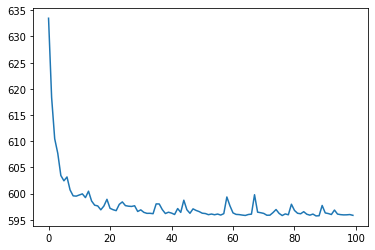

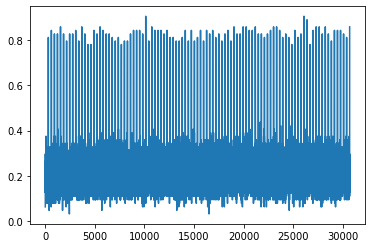

total loss 64.499 accuracy 0.245


In [8]:
class CNN(nn.Module):
    def __init__(self, lr, epochs, batch_size, num_classes= number_classes):
        super(CNN, self).__init__()
        self.epochs = epochs
        self.lr = lr
        self.batch_size = batch_size
        self.num_classes = num_classes
        self.loss_history = []
        self.acc_history = []
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        
        self.conv1 = nn.Conv1d(512, 128, 9)
        self.bn1 = nn.BatchNorm1d(128)
        
#         self.conv2 = nn.Conv1d(128, 128, 9)
#         self.bn2 = nn.BatchNorm1d(128)
        
        self.conv2 = nn.Conv1d(128, 96, 9)
        self.bn2 = nn.BatchNorm1d(96)
        
        self.maxpool1 = nn.MaxPool1d(2)
        
        self.conv3 = nn.Conv1d(96, 64, 3)
        self.bn3 = nn.BatchNorm1d(64)
        
        self.maxpool2 = nn.MaxPool1d(2)

        input_dims = self.calc_input_dims()

        self.fc1 = nn.Linear(input_dims, self.num_classes)

        self.optimizer = optim.Adam(self.parameters(), lr=self.lr)

        self.loss = nn.CrossEntropyLoss()
        self.to(self.device)
        self.get_data()

    def calc_input_dims(self):
        batch_data = T.zeros((1, 512, 100))
        batch_data = self.conv1(batch_data)
        #batch_data = self.bn1(batch_data)
        #batch_data = self.conv2(batch_data)
        #batch_data = self.bn2(batch_data)
        batch_data = self.conv2(batch_data)

        batch_data = self.maxpool1(batch_data)
        batch_data = self.conv3(batch_data)
        batch_data = self.maxpool2(batch_data)

        return int(np.prod(batch_data.size()))

    def forward(self, batch_data):
        batch_data = T.tensor(batch_data).to(self.device, dtype=torch.float )

        batch_data = self.conv1(batch_data)
        batch_data = self.bn1(batch_data)
        batch_data = F.relu(batch_data)

        #batch_data = self.conv2(batch_data)
        #batch_data = self.bn2(batch_data)
        #batch_data = F.relu(batch_data)

        batch_data = self.conv2(batch_data)
        batch_data = self.bn2(batch_data)
        batch_data = F.relu(batch_data)

        batch_data = self.maxpool1(batch_data)

        batch_data = self.conv3(batch_data)
        batch_data = self.bn3(batch_data)
        batch_data = F.relu(batch_data)

        batch_data = self.maxpool2(batch_data)

        batch_data = batch_data.view(batch_data.size()[0], -1)

        classes = self.fc1(batch_data)

        return classes


    def get_data(self):
        self.train_data_loader = T.utils.data.DataLoader(train_data,
                                                    batch_size=self.batch_size,
                                                    shuffle=True,
                                                    num_workers=8)

        self.test_data_loader = T.utils.data.DataLoader(test_data,
                                                    batch_size=self.batch_size,
                                                    shuffle=True,
                                                    num_workers=8)

    def _train(self):
        self.train()
        for i in range(self.epochs):
            ep_loss = 0
            ep_acc = []
            for j, (input, label) in enumerate(self.train_data_loader):
                self.optimizer.zero_grad()
                label = label.to(self.device)            
                prediction = self.forward(input)                
                loss = self.loss(prediction, label.flatten().to(self.device))
                prediction = F.softmax(prediction, dim=1)
                
                classes = T.argmax(prediction, dim=1)
                
                wrong = T.where(classes != label.flatten().to(self.device),
                                T.tensor([1.]).to(self.device, dtype=torch.float),
                                T.tensor([0.]).to(self.device, dtype=torch.float))
                
                acc = 1 - T.sum(wrong) / self.batch_size

                ep_acc.append(acc.item())
                self.acc_history.append(acc.item())
                ep_loss += loss.item()
                loss.backward()
                self.optimizer.step()
            print('Finish epoch ', i, 'total loss %.3f' % ep_loss,
                    'accuracy %.3f' % np.mean(ep_acc))
            self.loss_history.append(ep_loss)

    def _test(self):
        self.eval()

        ep_loss = 0
        ep_acc = []
        for j, (input, label) in enumerate(self.test_data_loader):
            label = label.to(self.device)          
            prediction = self.forward(input)                
            loss = self.loss(prediction, label.flatten().to(self.device))
            prediction = F.softmax(prediction, dim=1)
            classes = T.argmax(prediction, dim=1)
            wrong = T.where(classes != label.flatten().to(self.device),
                            T.tensor([1.]).to(self.device, dtype=torch.float),
                            T.tensor([0.]).to(self.device, dtype=torch.float))
            acc = 1 - T.sum(wrong) / self.batch_size

            ep_acc.append(acc.item())

            ep_loss += loss.item()

        print('total loss %.3f' % ep_loss,
                'accuracy %.3f' % np.mean(ep_acc))

# Running the model
if __name__ == '__main__':
    network = CNN(lr=0.001, batch_size=64, epochs= 100)
    network._train()
    plt.plot(network.loss_history)
    plt.show()
    plt.plot(network.acc_history)
    plt.show()
    network._test()

In [9]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in network.state_dict():
    print(param_tensor, "\t", network.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in network.optimizer.state_dict():
    print(var_name, "\t", network.optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([128, 512, 9])
conv1.bias 	 torch.Size([128])
bn1.weight 	 torch.Size([128])
bn1.bias 	 torch.Size([128])
bn1.running_mean 	 torch.Size([128])
bn1.running_var 	 torch.Size([128])
bn1.num_batches_tracked 	 torch.Size([])
conv2.weight 	 torch.Size([96, 128, 9])
conv2.bias 	 torch.Size([96])
bn2.weight 	 torch.Size([96])
bn2.bias 	 torch.Size([96])
bn2.running_mean 	 torch.Size([96])
bn2.running_var 	 torch.Size([96])
bn2.num_batches_tracked 	 torch.Size([])
conv3.weight 	 torch.Size([64, 96, 3])
conv3.bias 	 torch.Size([64])
bn3.weight 	 torch.Size([64])
bn3.bias 	 torch.Size([64])
bn3.running_mean 	 torch.Size([64])
bn3.running_var 	 torch.Size([64])
bn3.num_batches_tracked 	 torch.Size([])
fc1.weight 	 torch.Size([8, 1280])
fc1.bias 	 torch.Size([8])
Optimizer's state_dict:
state 	 {0: {'step': 30700, 'exp_avg': tensor([[[-3.2295e-07, -3.2422e-07, -3.0596e-07,  ..., -2.8598e-07,
          -2.7201e-07, -2.5929e-07],
         [-6.0082e-08, -4

In [10]:
PATH = 'C:/Users/kws/Documents/CNN1/CNN2_weights.pth'
torch.save(network.state_dict(), PATH)

In [ ]:
model = torch.load('C:/Users/kws/Documents/CNN1/CNN2_weights.pth')